This notebook is for debugging files that were not added to recordings.json

In [2]:
import pandas as pd
import os
from cetacean.mars_clip import MarsClip

In [3]:
df = pd.read_json('recordings.json')

In [16]:
fname = df.filename[10]

In [17]:
clip = MarsClip(fname)
sxx, _, _ = clip.get_spec_img()

/workspaces/mbari-hydrophone-stream-monitor/MARS-data-tagger/cetacean/mars_clip.py:29: RuntimeWarning: divide by zero encountered in log10
  sxx = 10*np.log10(sxx[:180])


In [18]:
sxx.shape

(180, 1249)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

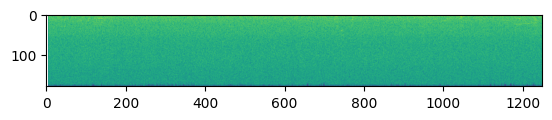

In [20]:
plt.imshow(sxx)

In [26]:
sxx[:,4:]

array([[ 15.893686 ,  32.310364 ,   1.8154585, ...,  28.870972 ,
         30.539146 ,  14.939776 ],
       [ 16.267086 ,  39.75265  ,  35.08658  , ...,  40.205757 ,
         41.28121  ,  31.63979  ],
       [  1.5991355,  33.642006 ,  29.006557 , ...,  31.269405 ,
         33.789856 ,  27.011206 ],
       ...,
       [-40.673218 , -36.62176  , -28.410275 , ...,  -9.240024 ,
        -10.718089 , -25.643387 ],
       [-41.226086 , -38.42646  , -34.218784 , ..., -20.890347 ,
        -22.971184 , -29.244926 ],
       [-49.033333 , -60.664978 , -39.86095  , ..., -52.89595  ,
        -38.22189  , -37.076054 ]], dtype=float32)

In [ ]:
filelist = os.listdir('assets/data/')
files = pd.DataFrame(filelist)[:-2]
files.columns = ['filename']

In [ ]:
df = pd.merge(df, files, how='outer', on='filename', sort=True)

In [ ]:
df['label'].loc[df['label'].isna()] = None

In [ ]:
df[df['label'].isna()]

In [ ]:
df.to_json('recordings.json')